# Plots amplicones VLT
  
Carolina Monzo; 2018-06-27  
Script for Amplicon plots  

## Commands for preprocessing  

\# Collapse amplicons bed file for correct coverage calculation  
cmc@brownie:/nfs/ngsbackup0/amplicon_val/vlt/miseq_validation/coverage_plots$ sort -k 1,1 -k 2,2n amplicons_vlt.bed | bedtools merge -i - -c 4 -o distinct -delim "_" > vlt_sorted_merged.bed  
  
\# Get coverage per base for all regions of interest  
cmc@brownie:/nfs/ngsbackup0/amplicon_val/vlt/miseq_validation/coverage_plots$ for file in $(find ../total_bams_75-83-105-109/ -name "\*.bam" | xargs -n1 basename); do echo "bedtools intersect -bed -g /media/scratch/vlinuxmiseq/180419_RUN0001/wspace_coverage/chrom_complete.sizes -a ../total_bams_75-83-105-109/\$file -b vlt_sorted_merged.bed | bedtools coverage -g /media/scratch/vlinuxmiseq/180419_RUN0001/wspace_coverage/chrom_complete.sizes -d -a vlt_sorted_merged.bed -b - | grep -v \'^all\' > $\{file%.bam\}.pbcov"; done > cmd_bedtoolscov.sh  

cmc@brownie:/nfs/ngsbackup0/amplicon_val/vlt/miseq_validation/coverage_plots$ #parallel -j 10 --joblog coverages_amplicons.log :::: cmd_bedtoolscov.sh  

cmc@brownie:/nfs/ngsbackup0/amplicon_val/vlt/miseq_validation/coverage_plots$ find . -name "*.pbcov" > pbcov.fof  

\# We cant open too many files at the same time so we split them into smaller fofs  
cmc@brownie:/nfs/ngsbackup0/amplicon_val/vlt/miseq_validation/coverage_plots$ split -l 200 pbcov.fof  

\# Prepare commands to paste coverage columns  
cmc@brownie:/nfs/ngsbackup0/amplicon_val/vlt/miseq_validation/coverage_plots$ python3.5 concating.py  

cmc@brownie:/nfs/ngsbackup0/amplicon_val/vlt/miseq_validation/coverage_plots$ for file in $(ls cmd*); do bash $file; done  

\# Paste coverage columns from all files  
cmc@brownie:/nfs/ngsbackup0/amplicon_val/vlt/miseq_validation/coverage_plots$ paste -d "\\t" <(cat pasted_xaa.tsv) <(cut -f 7- pasted_xab.tsv) <(cut -f 7- pasted_xac.tsv) <(cut -f 7- pasted_xad.tsv) <(cut -f 7- pasted_xae.tsv) <(cut -f 7- pasted_xaf.tsv) <(cut -f 7- pasted_xag.tsv) <(cut -f 7- pasted_xah.tsv) <(cut -f 7- pasted_xai.tsv) <(cut -f 7- pasted_xaj.tsv) <(cut -f 7- pasted_xak.tsv) <(cut -f 7- pasted_xal.tsv) <(cut -f 7- pasted_xam.tsv) <(cut -f 7- pasted_xan.tsv) <(cut -f 7- pasted_xao.tsv) > complete_paste.tsv  

\# Check that files have the correct amount of columns  
cmc@brownie:/nfs/ngsbackup0/amplicon_val/vlt/miseq_validation/coverage_plots$ cat complete_paste.tsv | head -n1 | awk '{print NF}'  
2995  

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')

In [4]:
# Read coverage per base file and add column names to the file
head = ["chr", "start", "end", "feature", "base"]
num = []
# Create header
for i in range(1, 2991):
    num.append(i)

header = head + num

df = pd.read_csv("./complete_paste.tsv",
                 sep="\t", names=header)
df.head()

,chr,start,end,feature,base,1,2,3,4,5,...,2981,2982,2983,2984,2985,2986,2987,2988,2989,2990
0,10,115312813,115313002,habp2-exon1,1,326,326,87,52,6,...,30,0,83,120,44,22,74,172,31,46
1,10,115312813,115313002,habp2-exon1,2,346,346,89,54,6,...,30,0,90,122,49,22,77,179,34,49
2,10,115312813,115313002,habp2-exon1,3,360,360,90,55,6,...,30,0,91,123,49,22,80,180,34,53
3,10,115312813,115313002,habp2-exon1,4,371,371,91,55,6,...,30,0,92,124,49,22,80,180,34,54
4,10,115312813,115313002,habp2-exon1,5,373,373,91,56,6,...,30,0,92,124,50,22,81,180,34,55


In [5]:
df["mean"] = df.loc[:, num].mean(axis=1)

gene_list = []
for gene in list(df["feature"]):
    gene_list.append(gene.split("-")[0])
    
df["gene"] = gene_list
df.head()

,chr,start,end,feature,base,1,2,3,4,5,...,2983,2984,2985,2986,2987,2988,2989,2990,mean,gene
0,10,115312813,115313002,habp2-exon1,1,326,326,87,52,6,...,83,120,44,22,74,172,31,46,75.475920,habp2
1,10,115312813,115313002,habp2-exon1,2,346,346,89,54,6,...,90,122,49,22,77,179,34,49,78.661873,habp2
2,10,115312813,115313002,habp2-exon1,3,360,360,90,55,6,...,91,123,49,22,80,180,34,53,79.820401,habp2
3,10,115312813,115313002,habp2-exon1,4,371,371,91,55,6,...,92,124,49,22,80,180,34,54,80.755184,habp2
4,10,115312813,115313002,habp2-exon1,5,373,373,91,56,6,...,92,124,50,22,81,180,34,55,81.225084,habp2


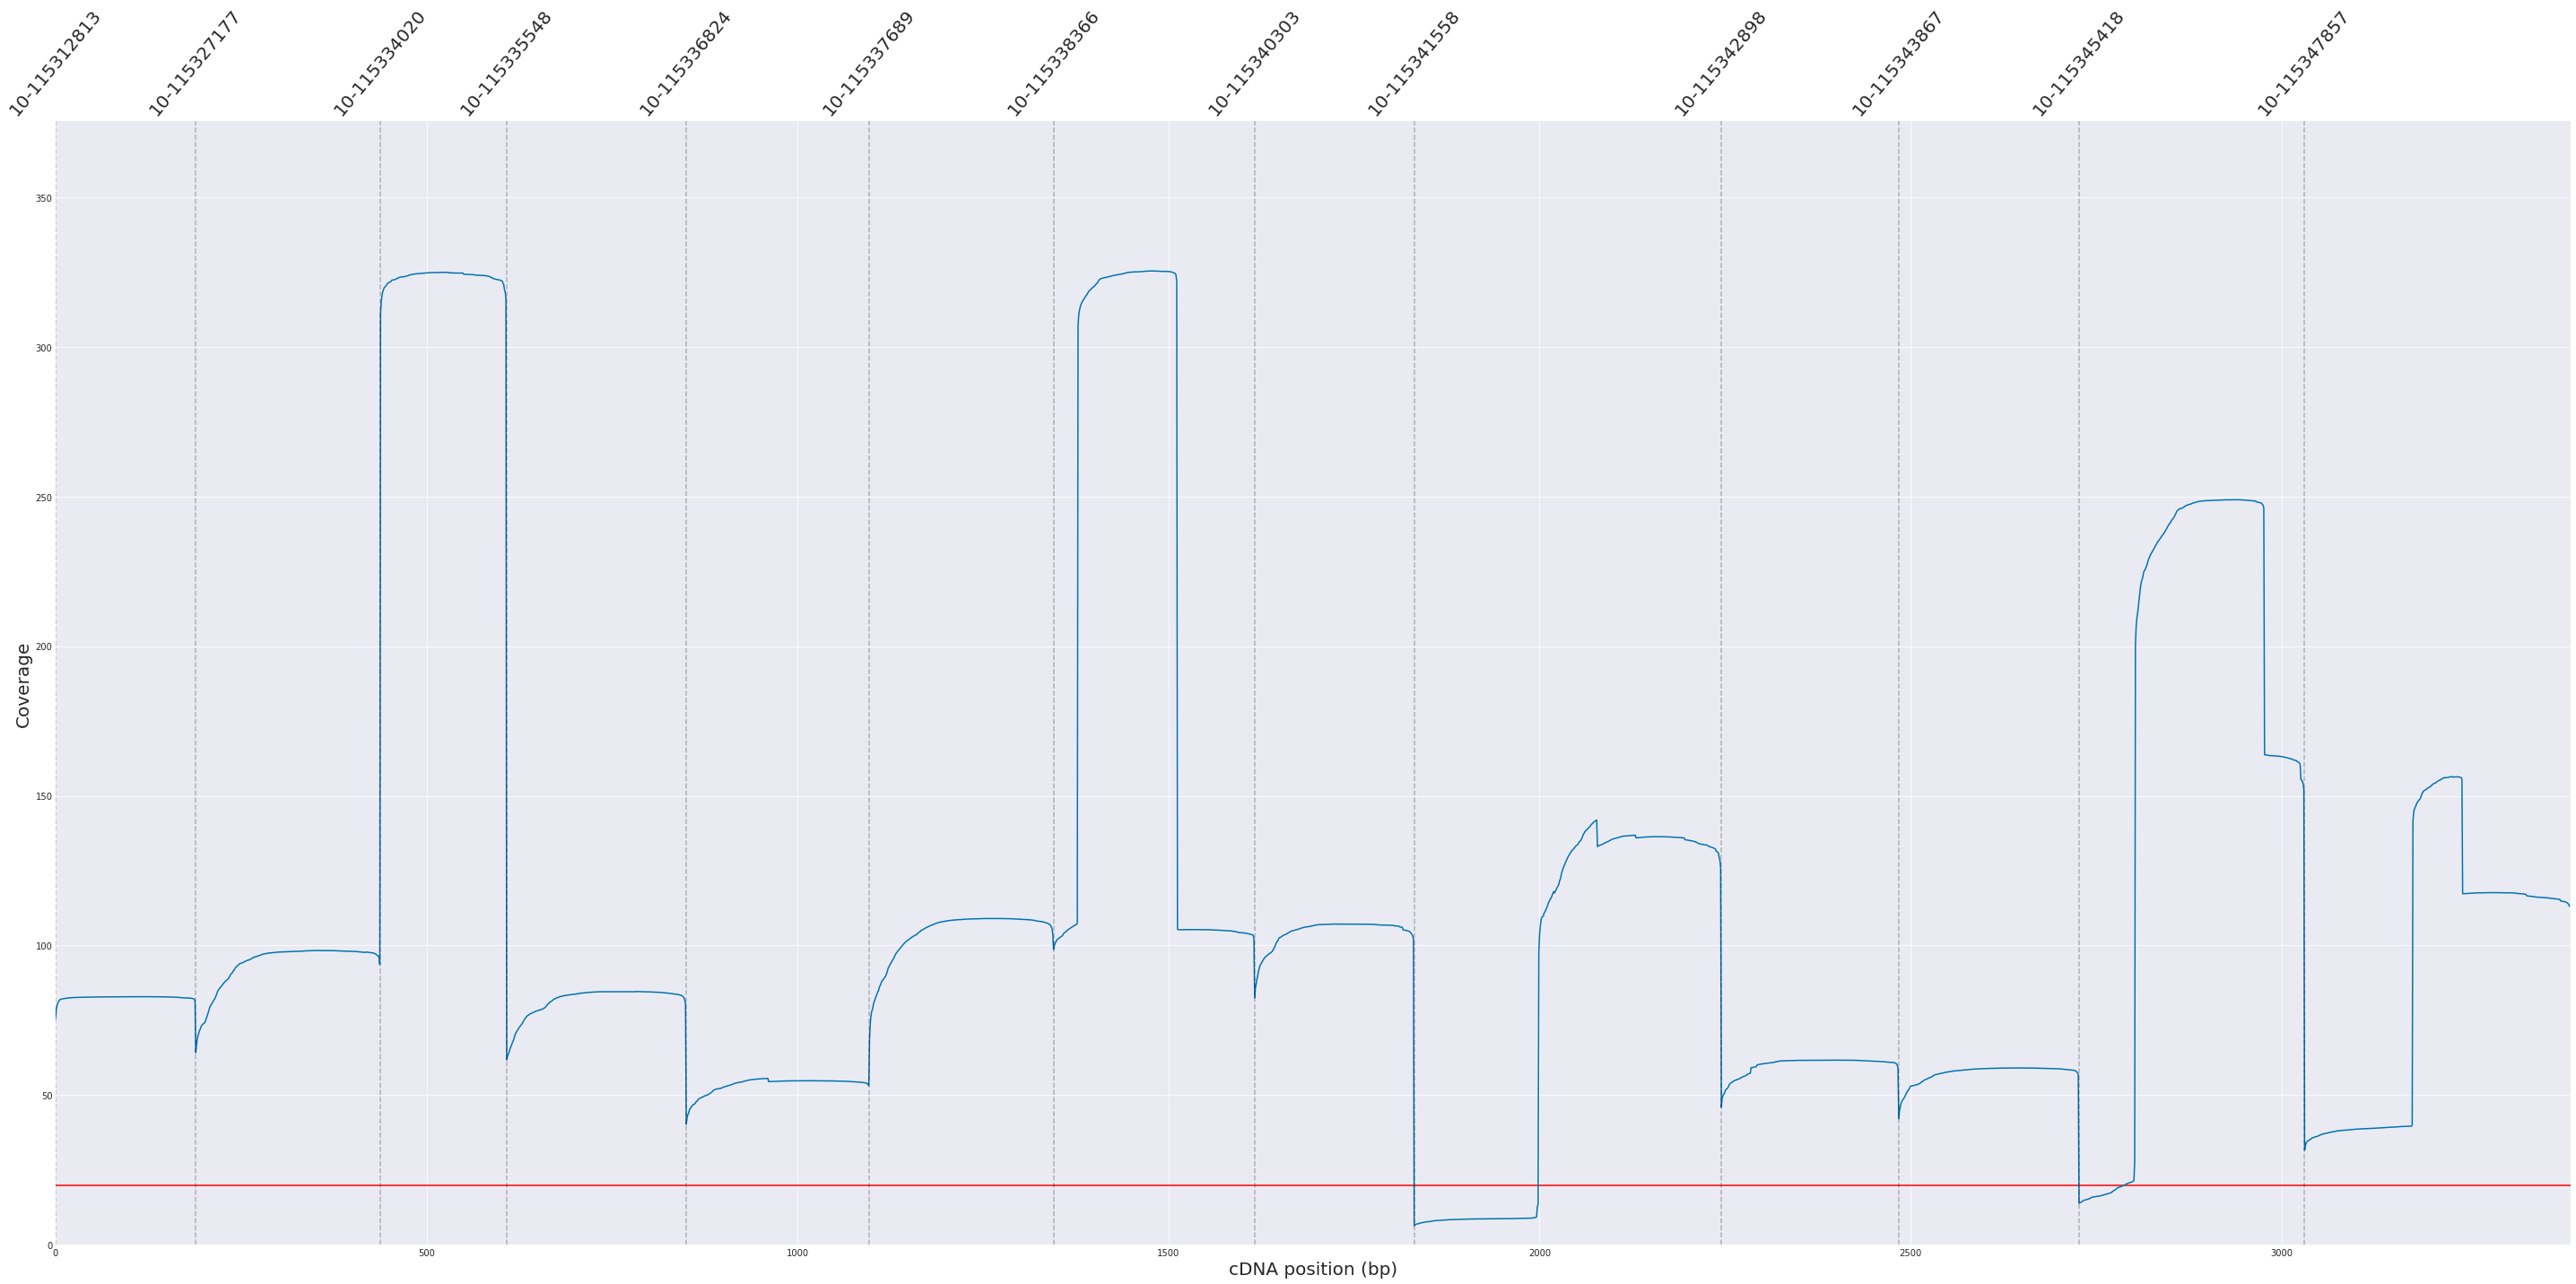

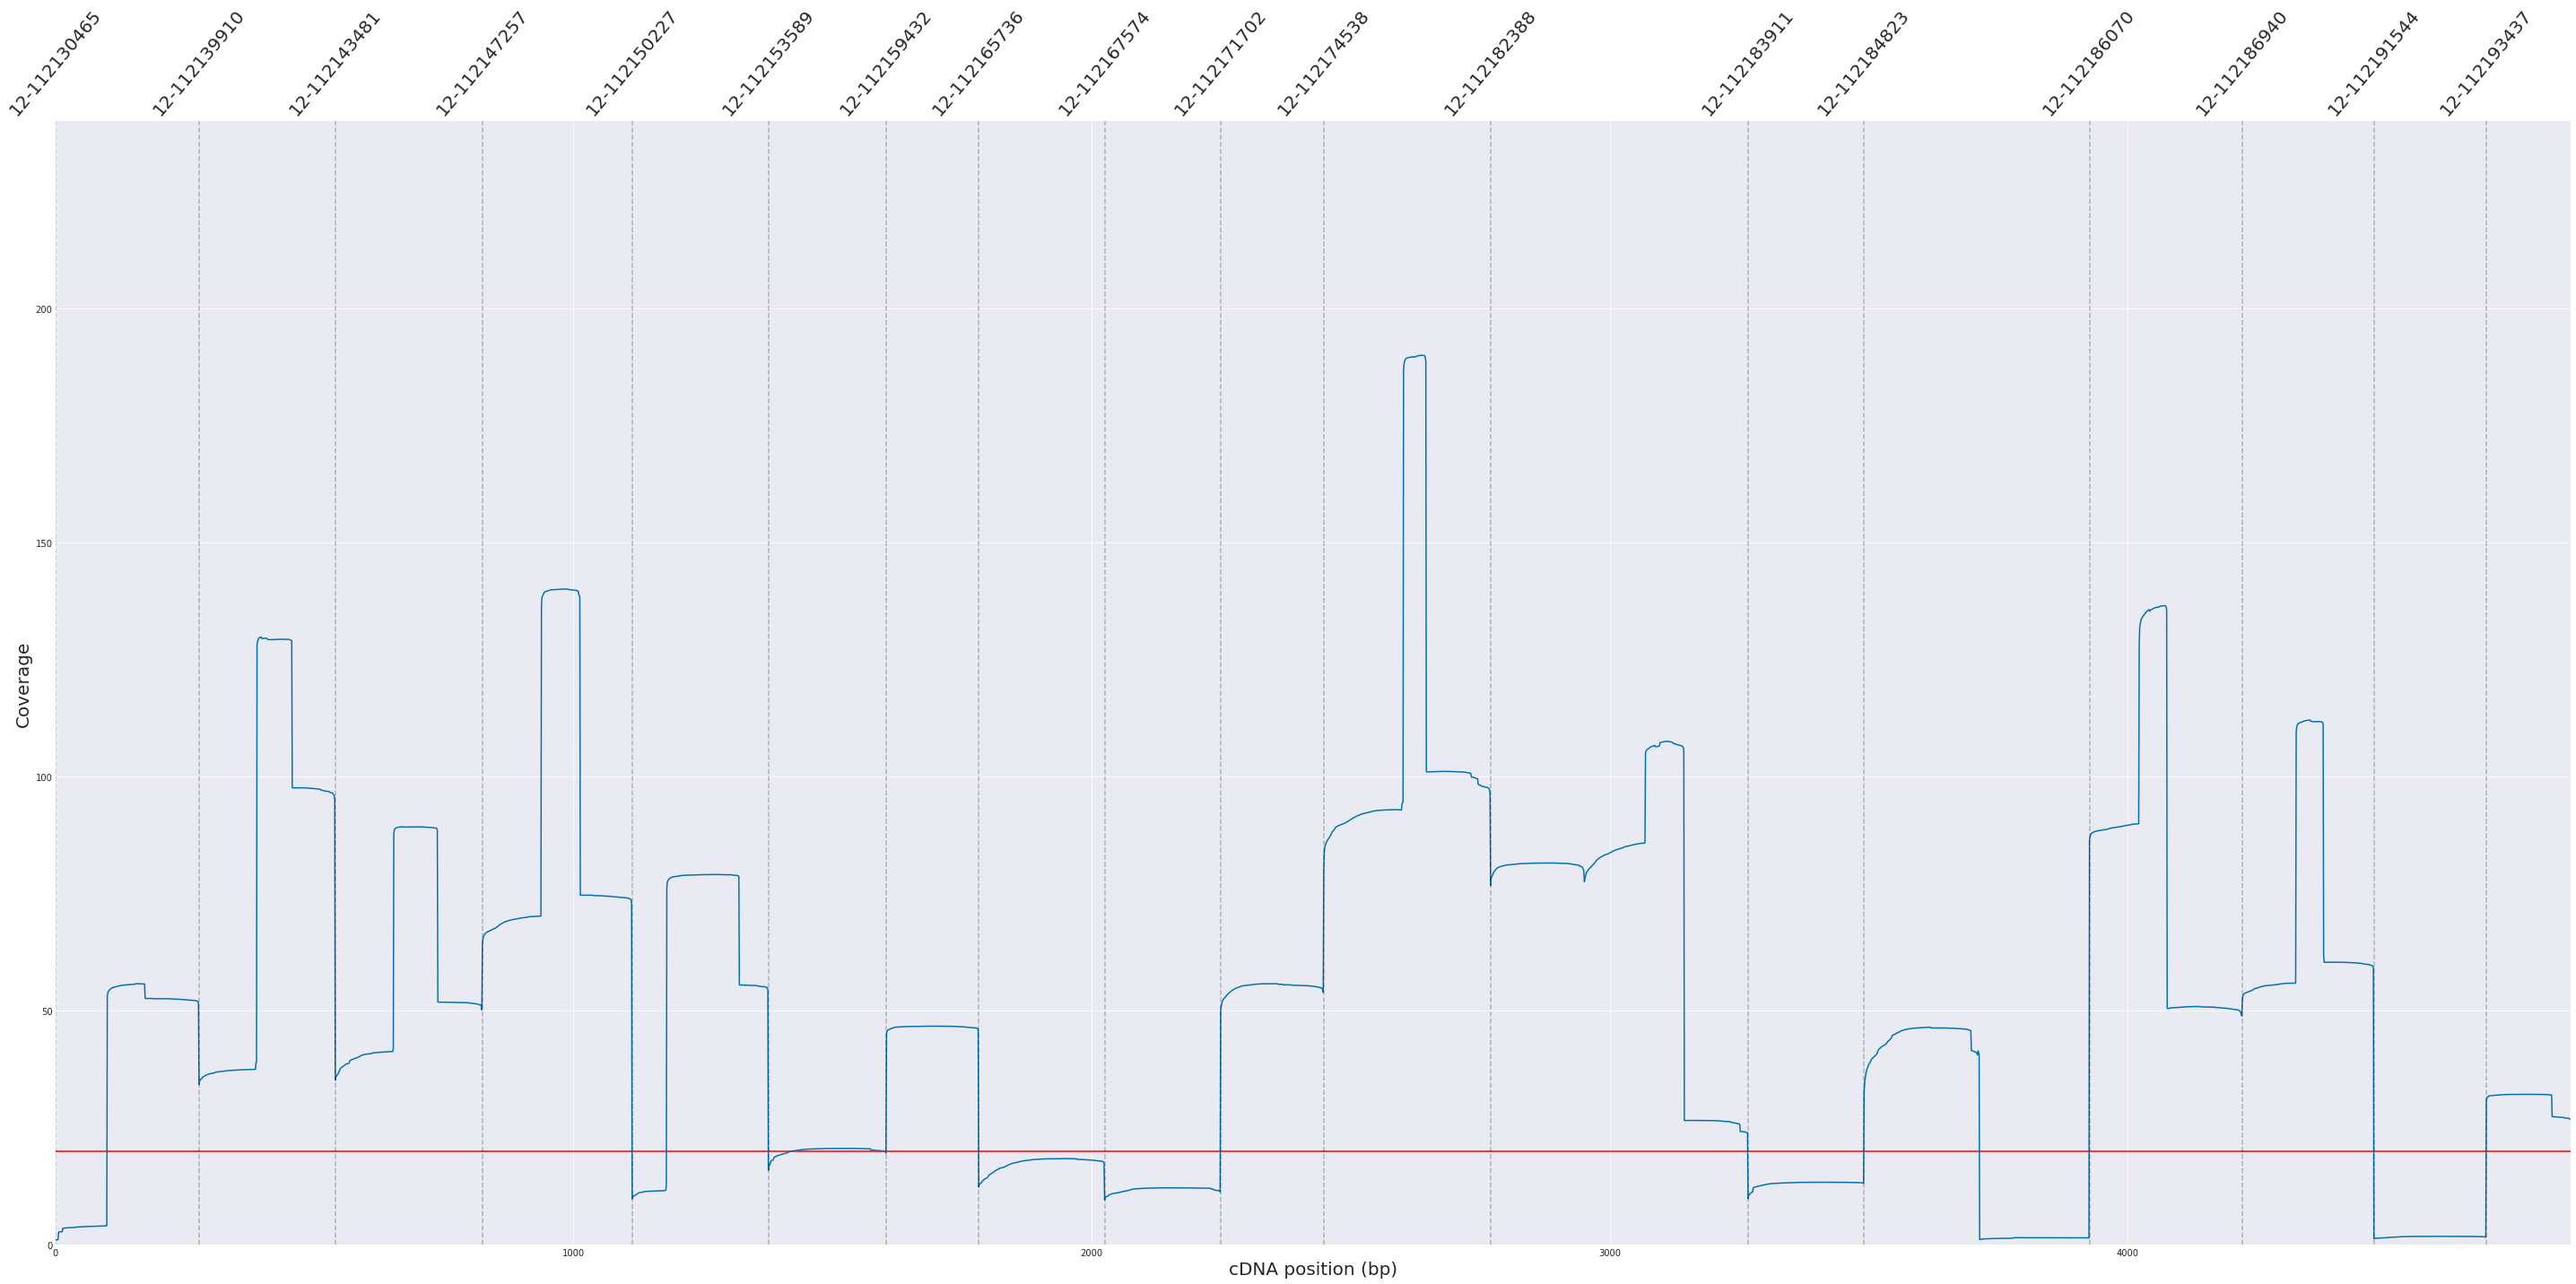

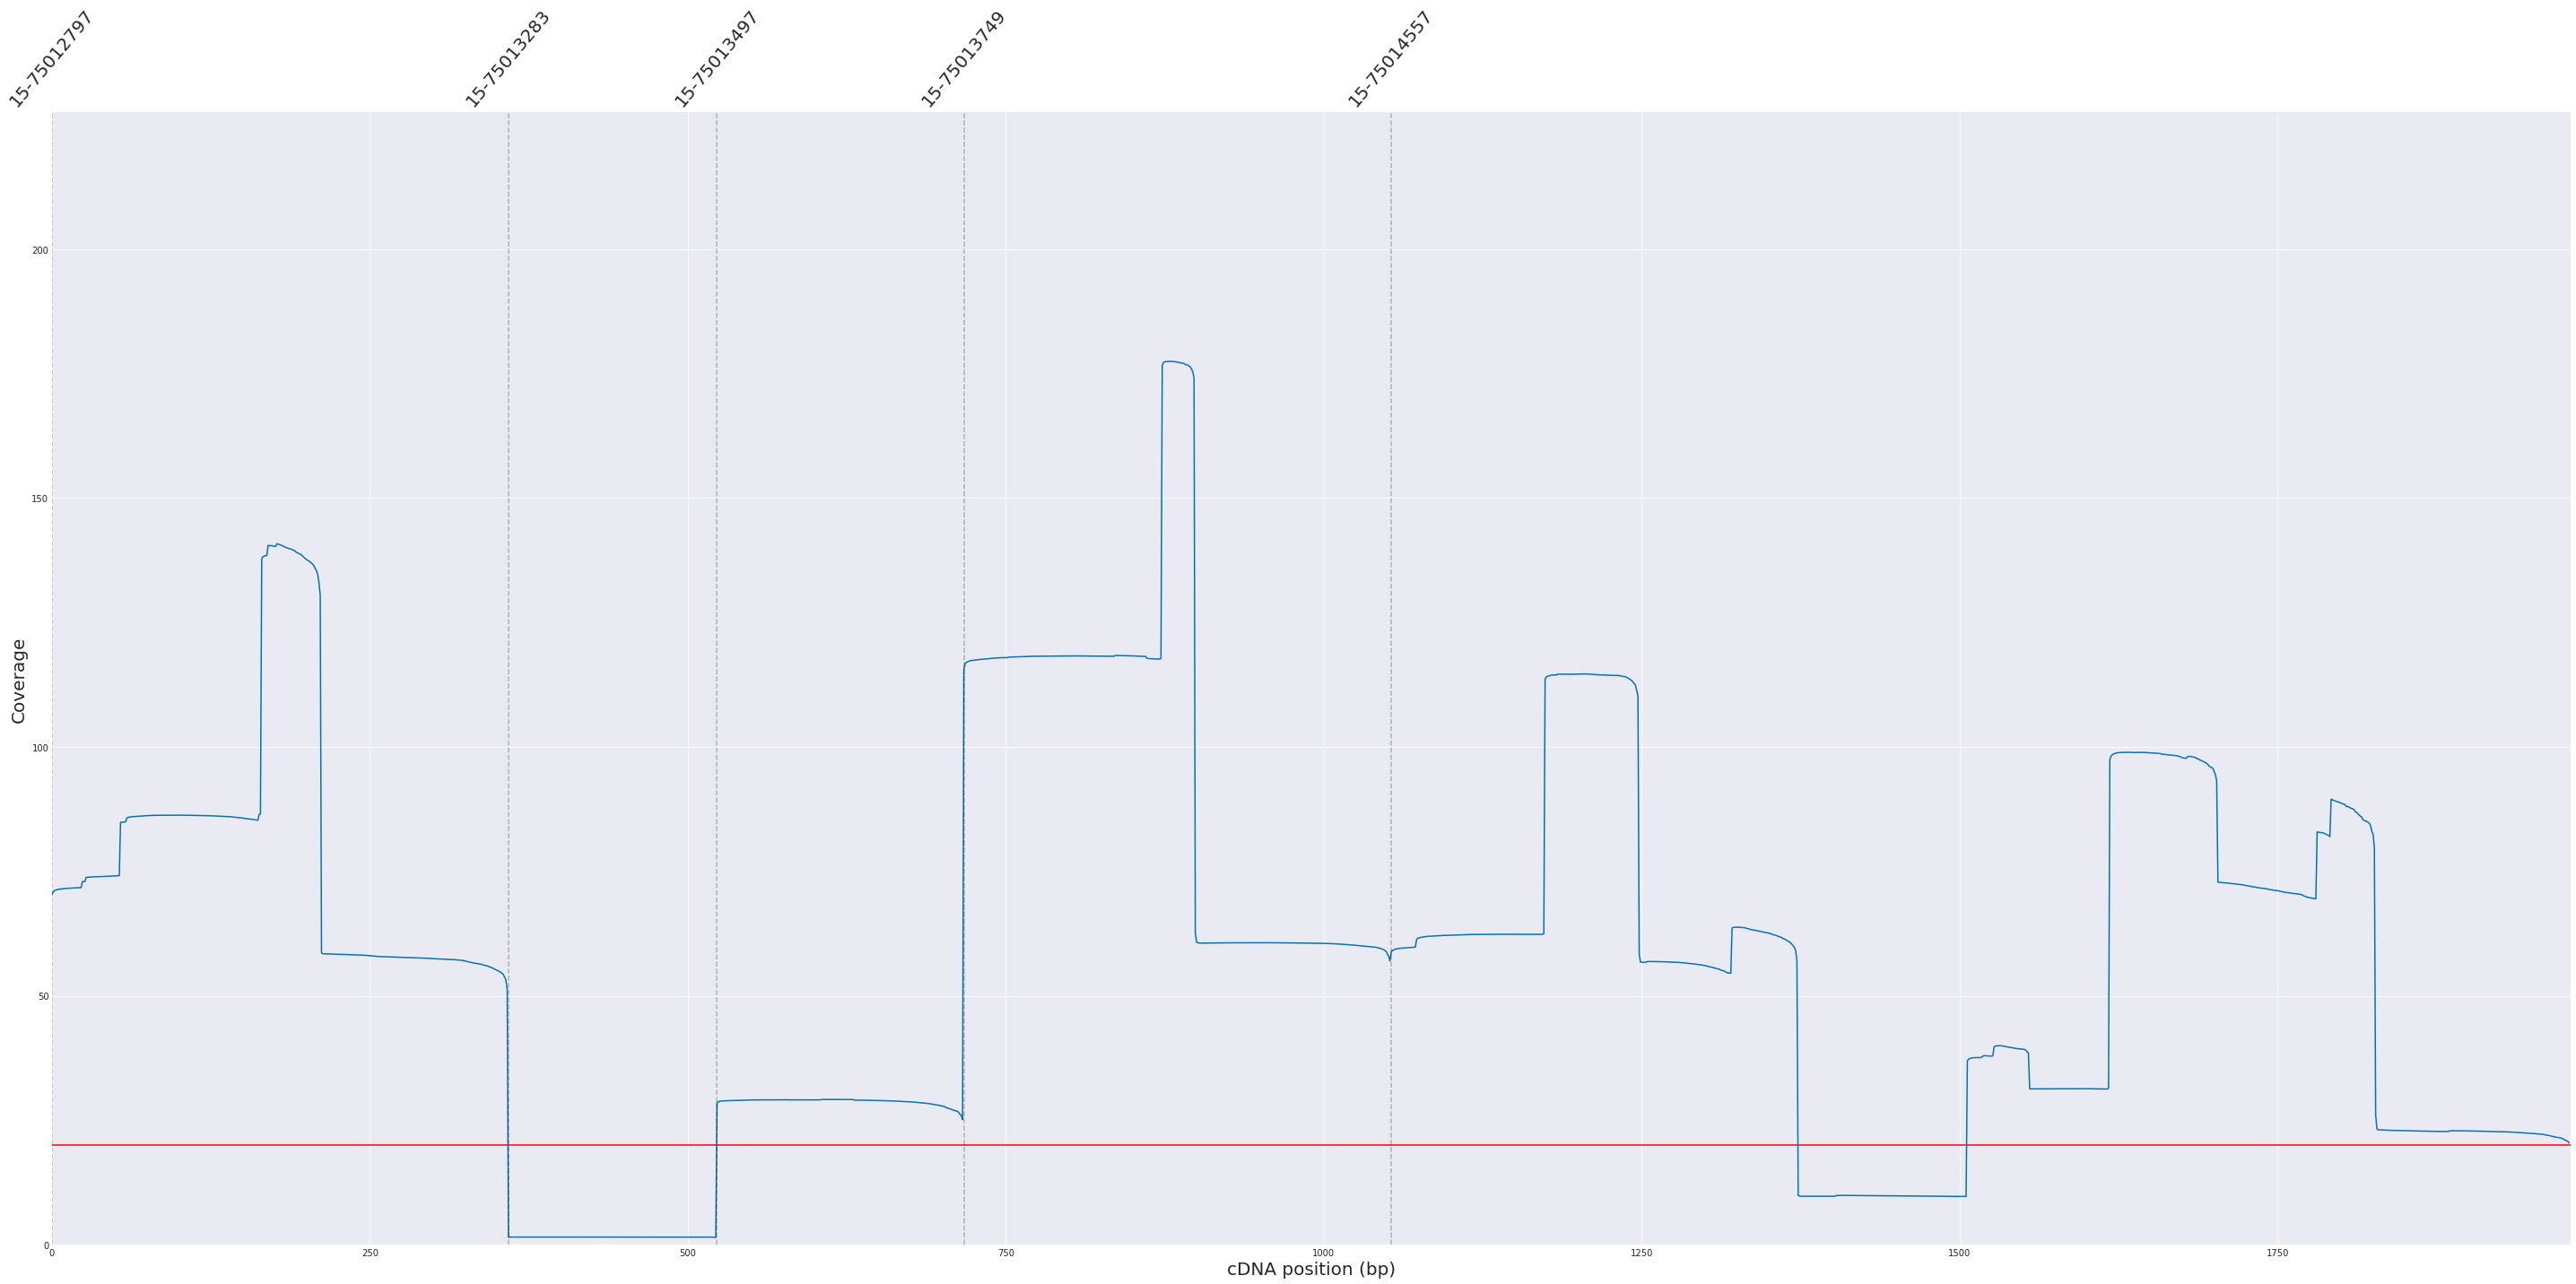

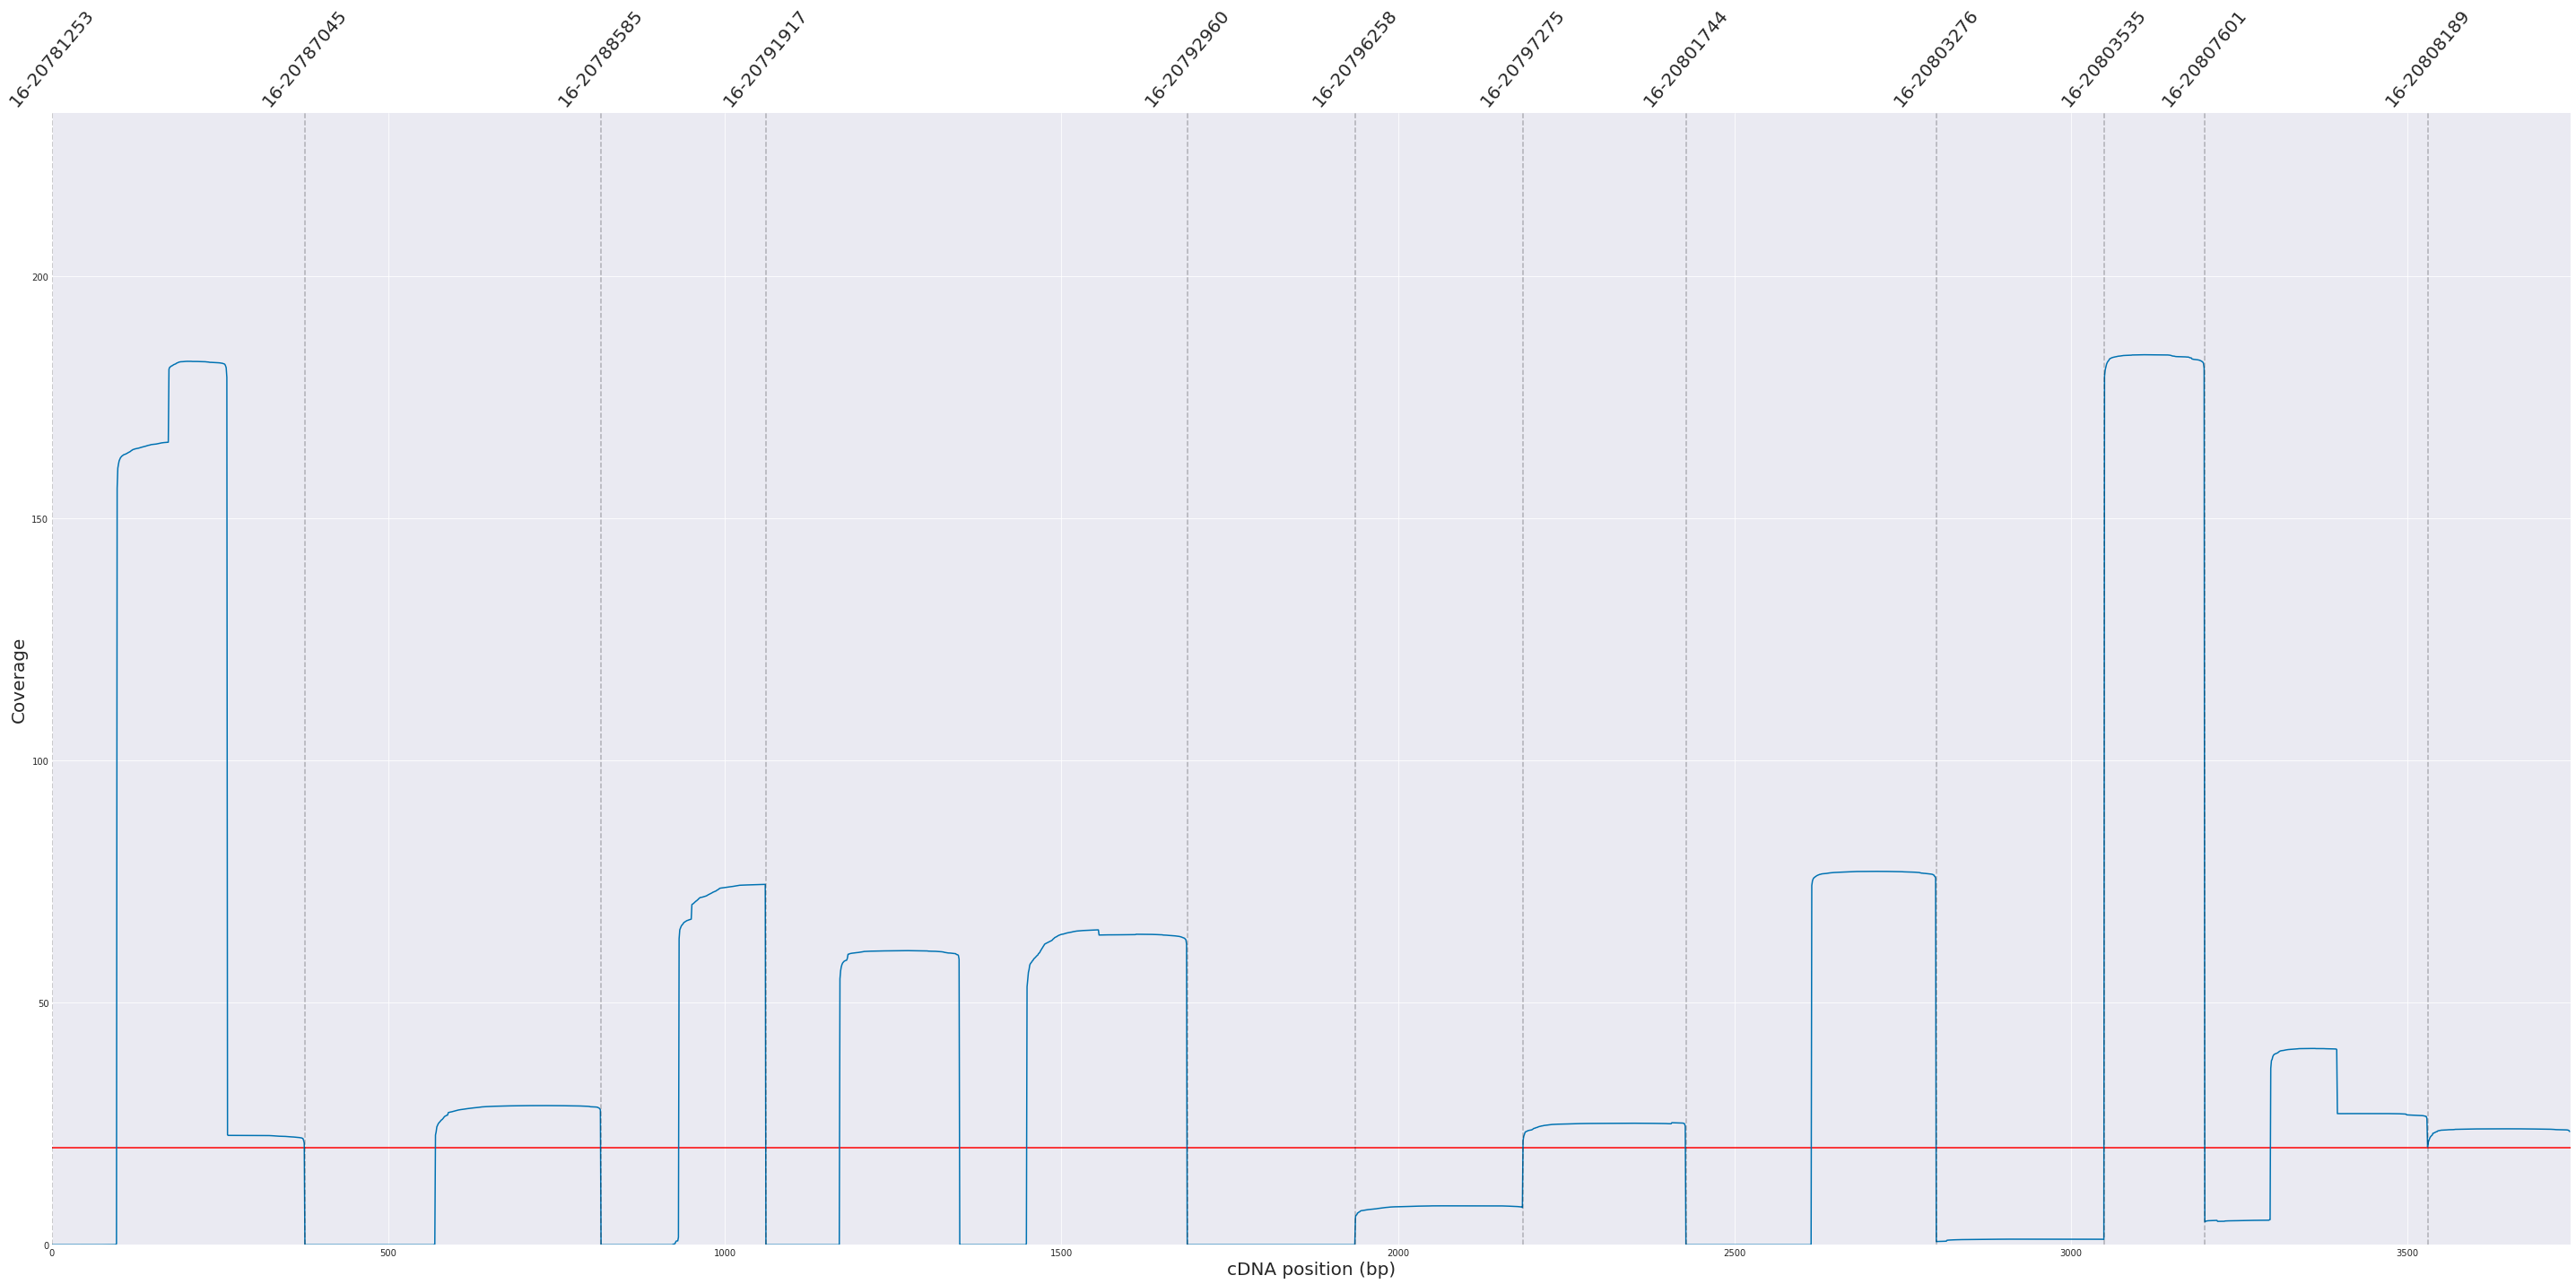

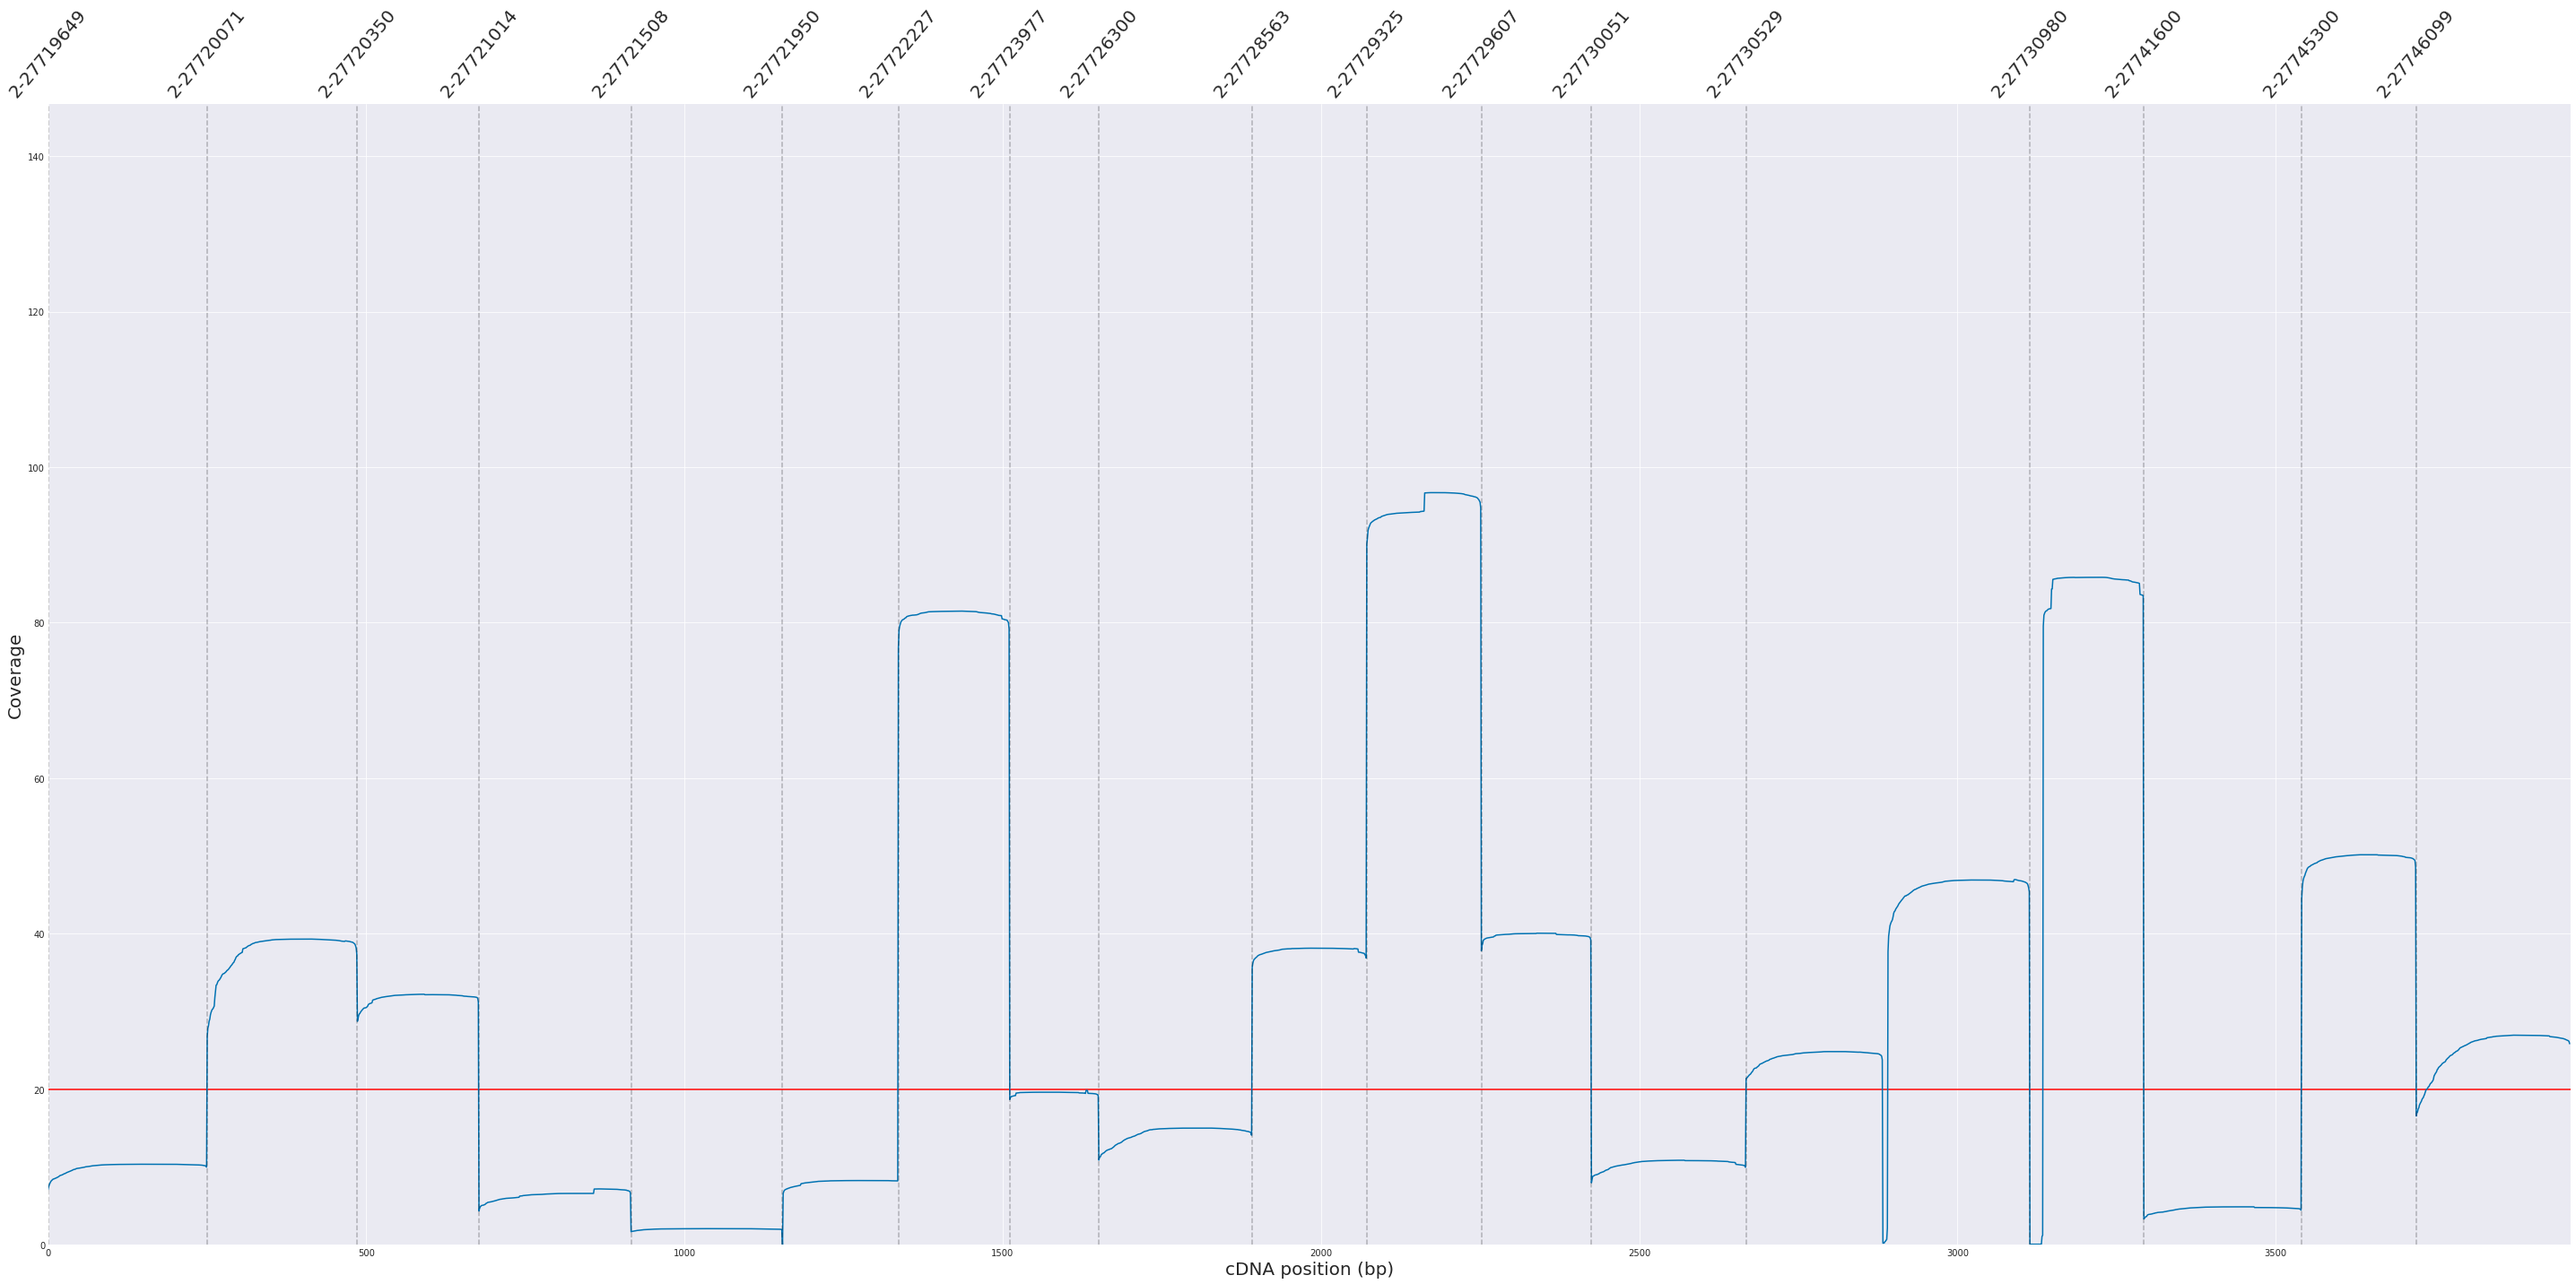

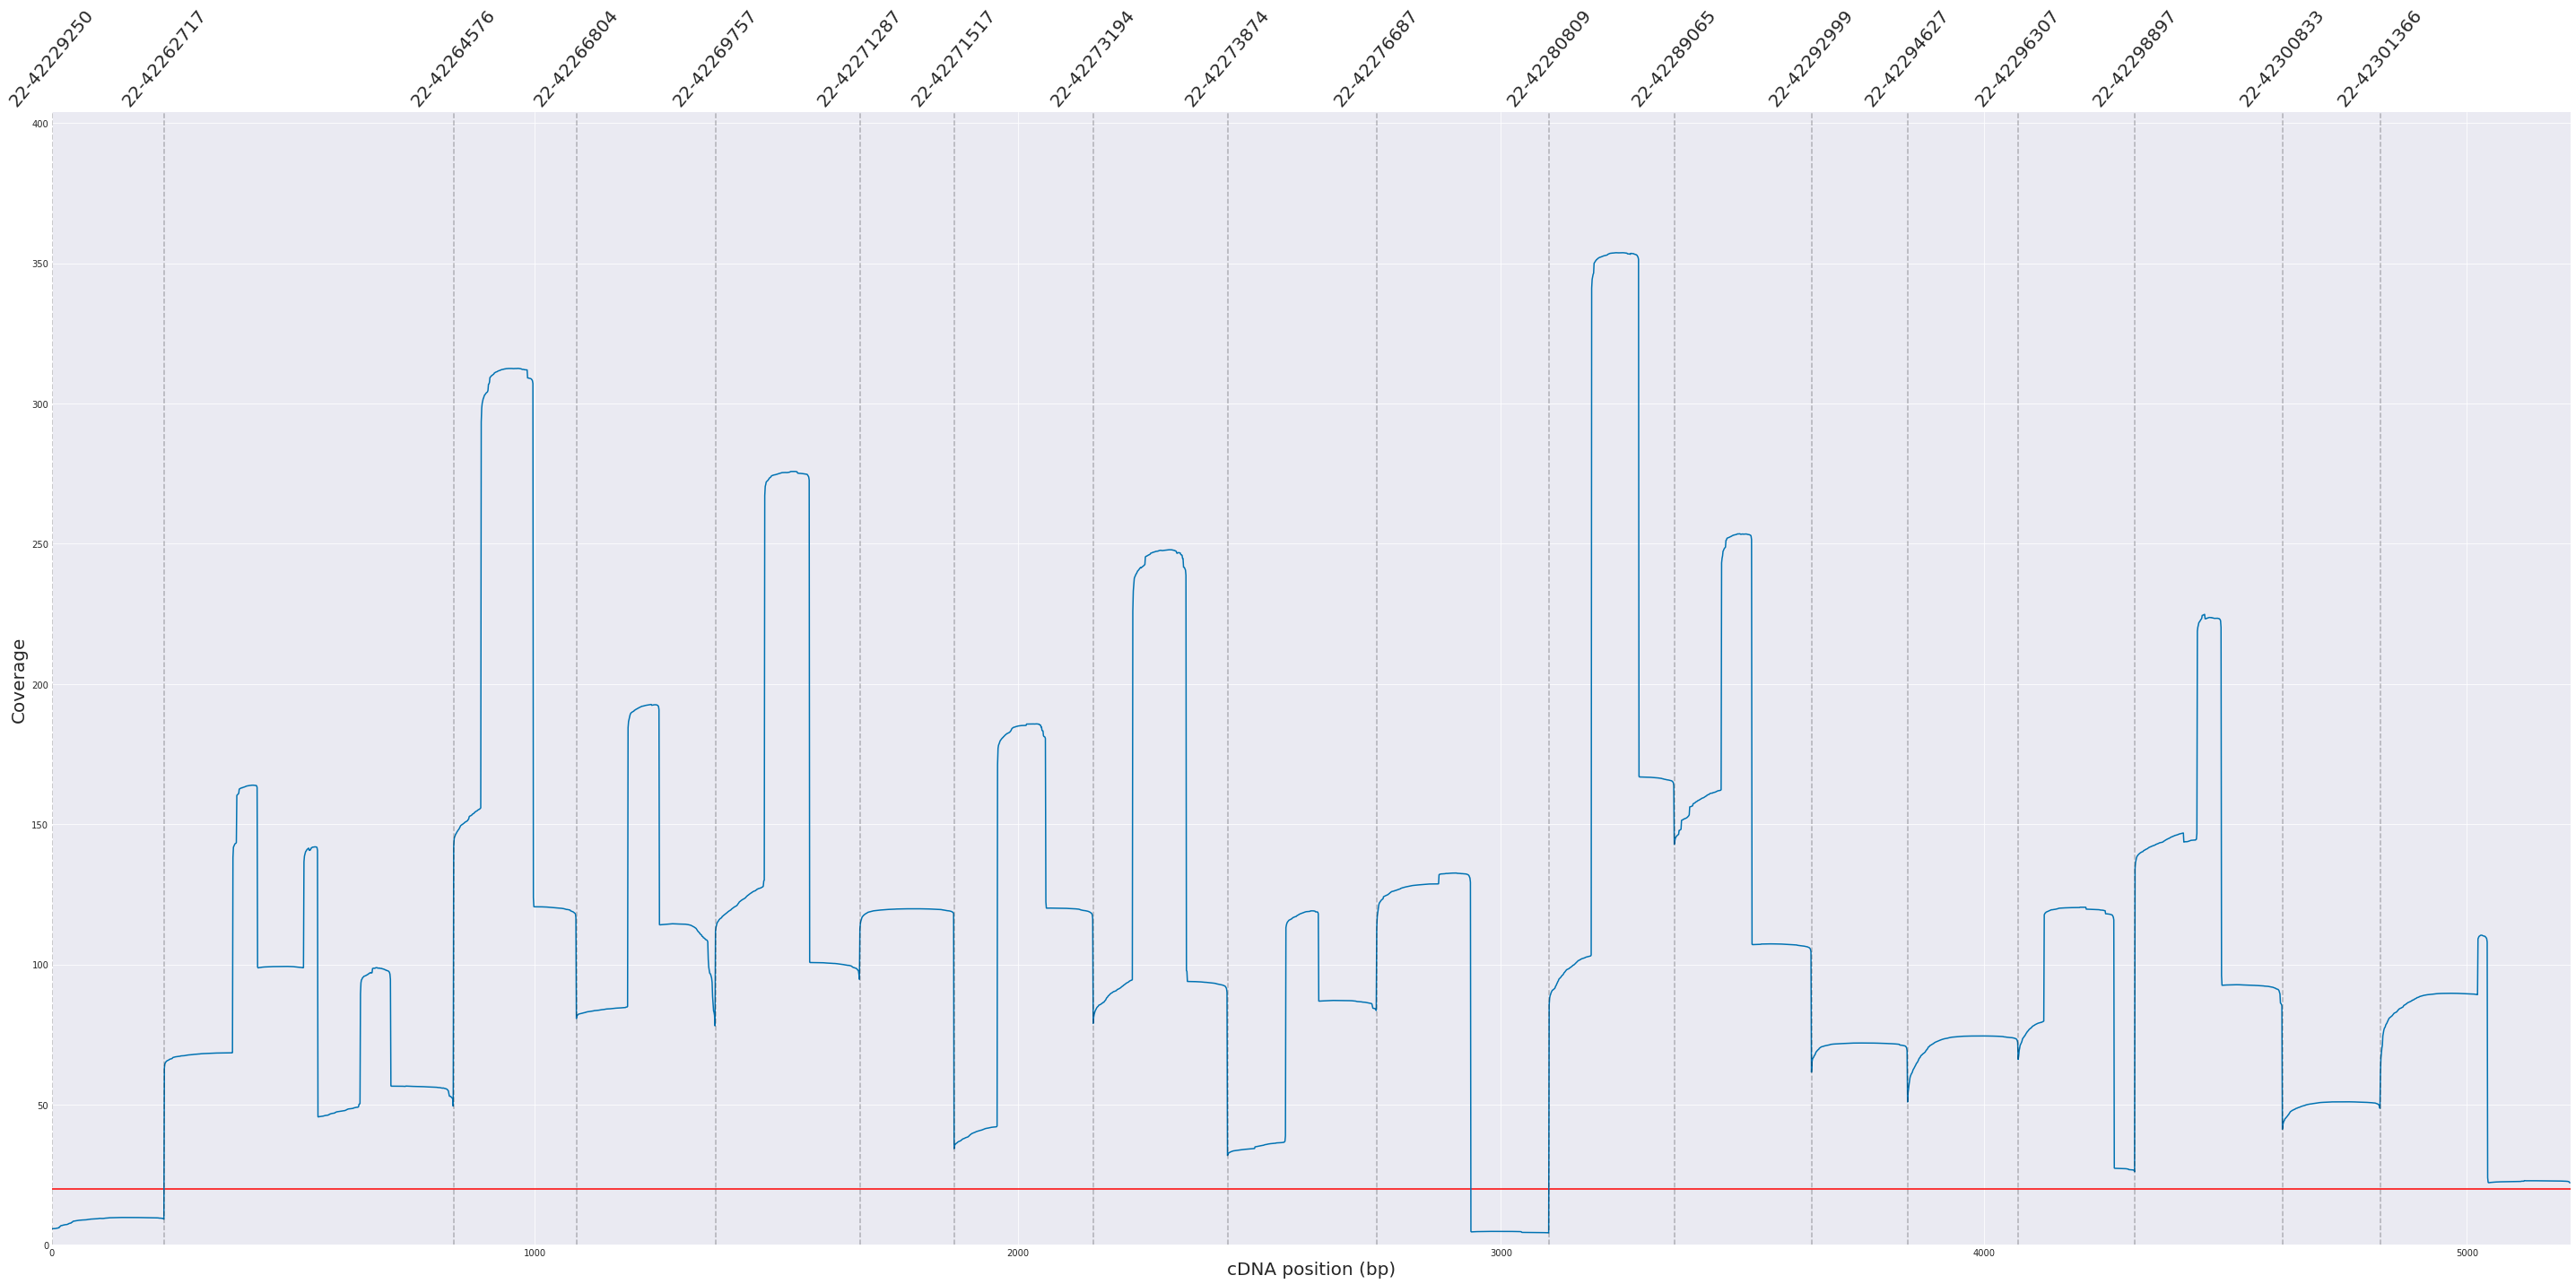

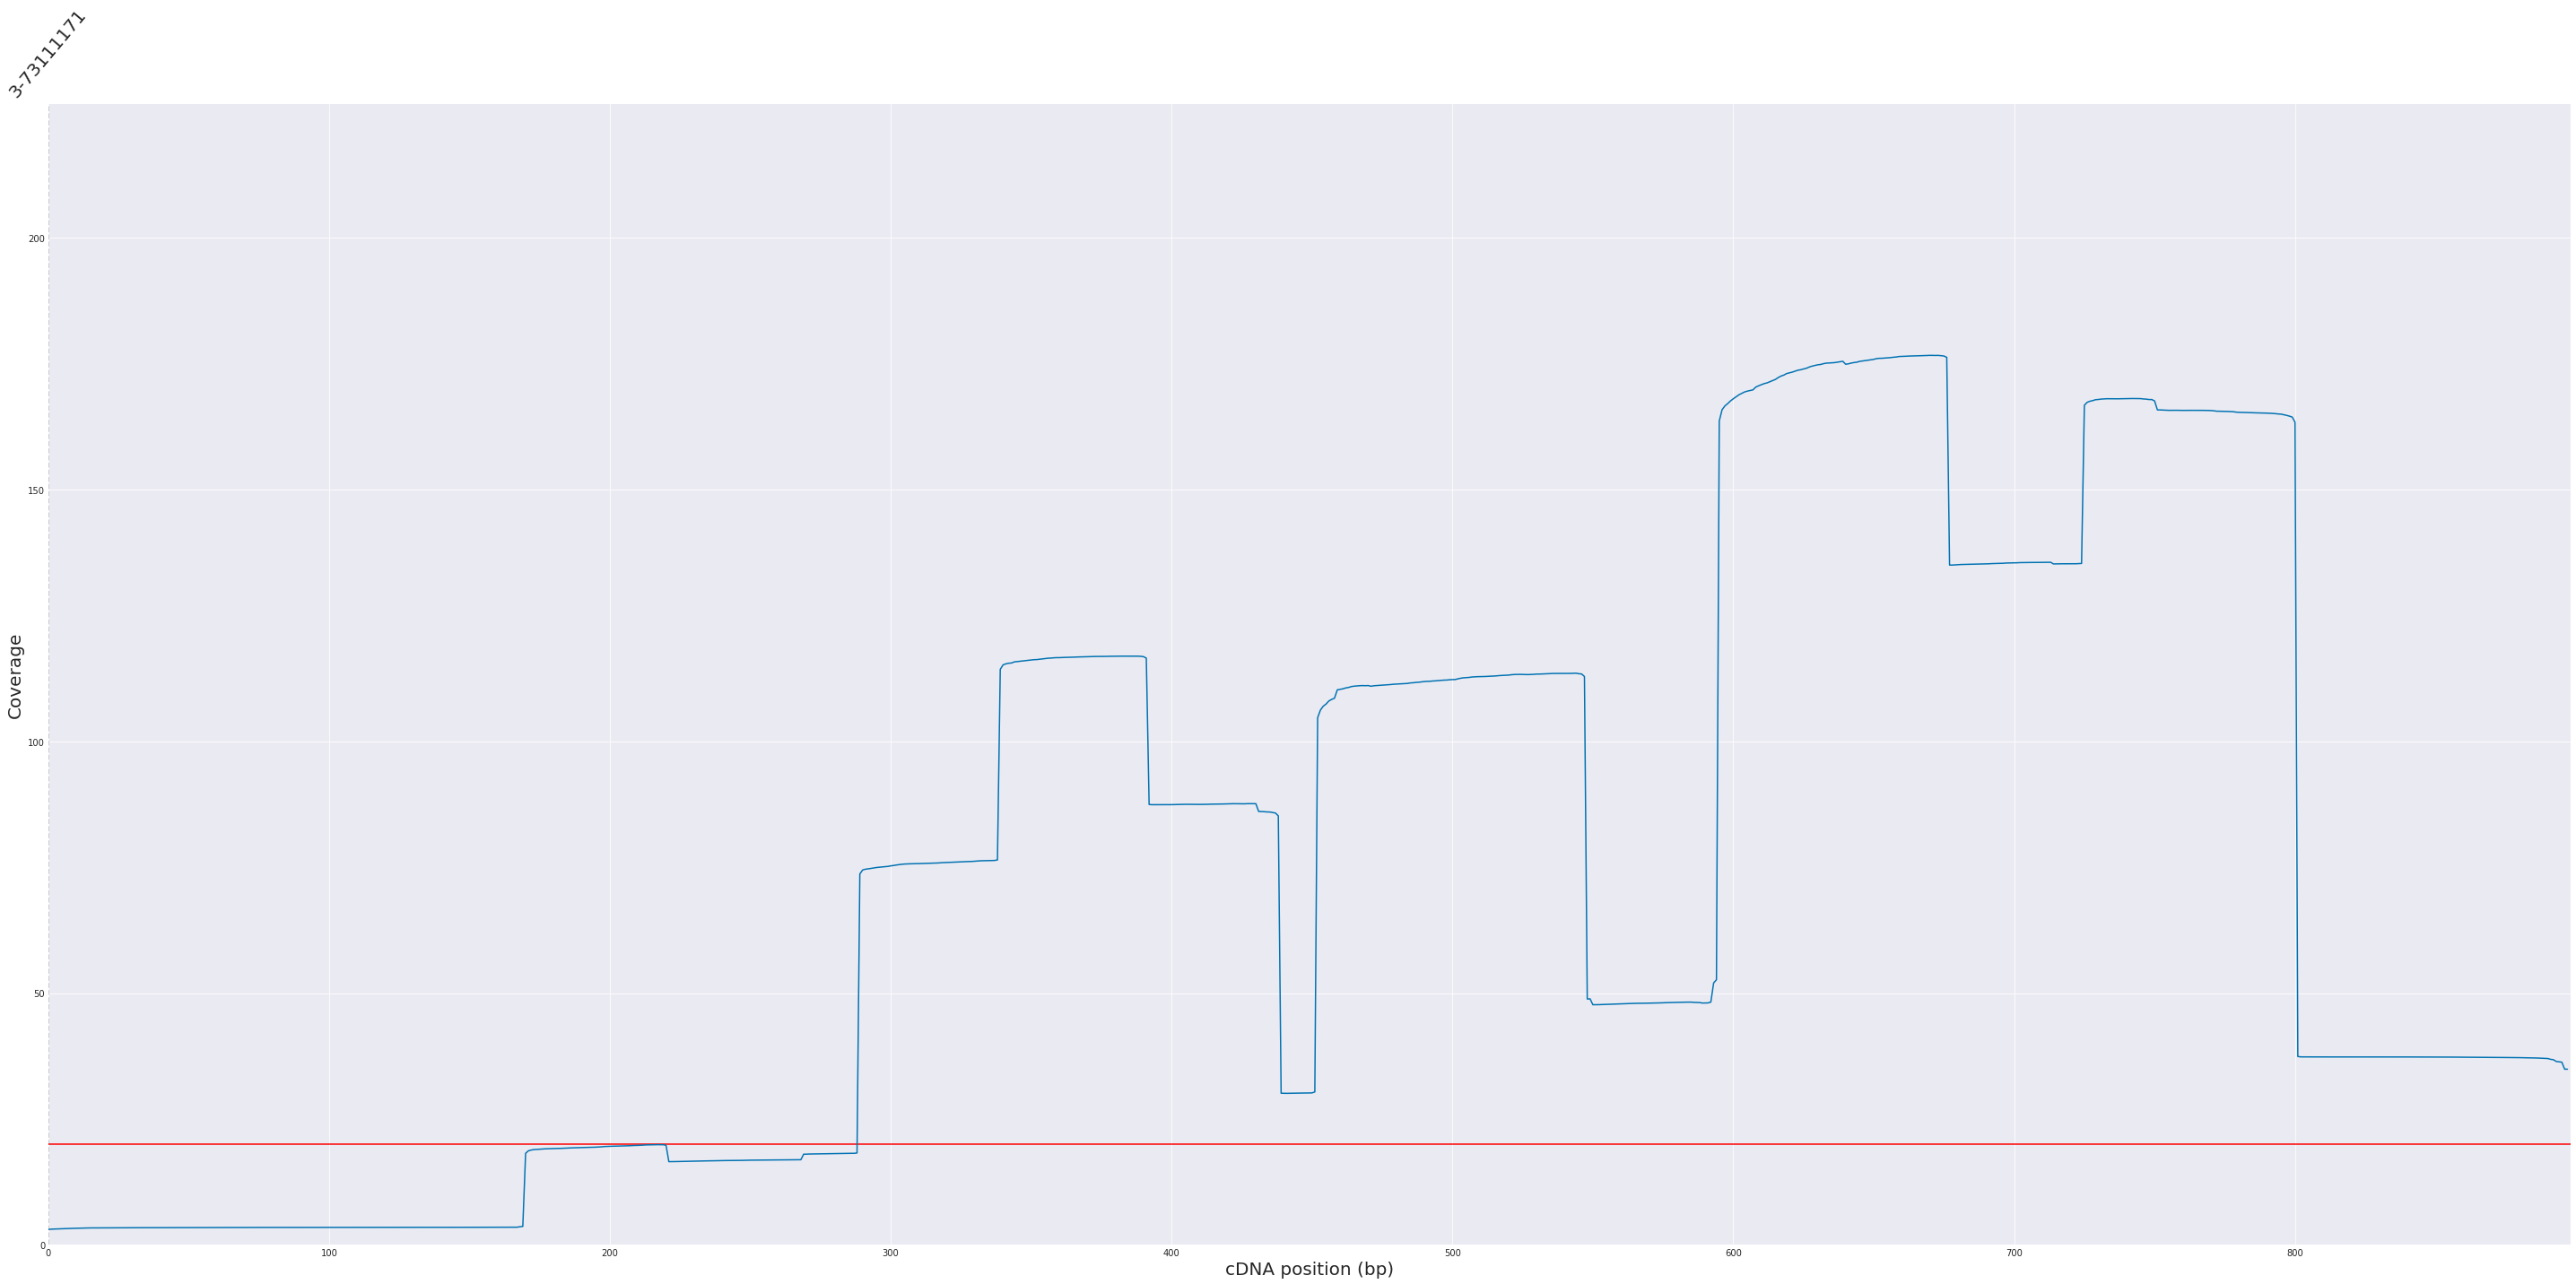

In [6]:
# Create a copy of the dataframe so I dont make changes to the original dataframe
ab = df.copy()

# Create a dataframe per gene
for gene in list(ab.gene.unique()):
    dfg = ab.loc[ab['gene'].map(str) == gene].reset_index(drop=True)
    dfg["index"] = dfg.index

    # Create a plot per gene
    fig = plt.figure(figsize=(40,20))
    ax1 = fig.add_subplot(111)
    ax1.plot(dfg['index'], dfg['mean'], alpha=1)
    # Plot limits
    ax1.set_ylim(0, dfg['mean'].max() + 50)
    ax1.set_xlim(0, dfg['index'].max() + 1)
    ax1.hlines(y=20, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r')

    # Getting positions to plot vertical lines separating exons
    index_positions = []
    names = []
    for exon in list(dfg.feature.unique()):
        index_positions.append(dfg[dfg['feature']==exon].iloc[0]["index"])
        names.append(str(dfg[dfg['feature']==exon].iloc[0]["chr"]) + "-" + 
                     str(dfg[dfg['feature']==exon].iloc[0]["start"]))

    # Set limits for the vertical lines, it is a plot on top of a plot
    ax2 = ax1.twiny()
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_xlim(ax1.get_xlim())

    # Paint vertical lines, we use [1:] because the first point is always zero
    ax2.vlines(x=index_positions, ymin=0, ymax=ax2.get_ylim()[1], linestyle='--', 
               alpha=0.25)
    ax2.grid(b=False)
    ax2.set_xticks(index_positions)
    ax2.set_xticklabels(names, rotation=50, minor=False, fontsize=20)

    ax1.set_xlabel('cDNA position (bp)', fontsize=20)
    ax1.set_ylabel('Coverage', fontsize=20)

    fig.tight_layout()
    figname = "{}_pbcov.png".format(gene)
    fig.savefig(os.path.join("./", figname))
    plt.show()
    plt.close(fig)